
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: September 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Jordan Pflum
2. Christian Lee

# Question 1 (Understanding ElasticNet, 30 points)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("life.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [4]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,...,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,...,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,...,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,...,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [5]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Question 1.1 (5 points) 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

### Training

In [6]:
reg = LinearRegression().fit(X_train, y_train)
print("The R2 score for the training data is {}".format(reg.score(X_train, y_train)))

The R2 score for the training data is 0.8869822224758938


### Testing

In [7]:
print("The R2 score for the testing data is {}".format(reg.score(X_test, y_test)))


The R2 score for the testing data is 0.8355055233630166


## Question 1.2 (8 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [8]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

n_folds = 5
k_fold = KFold(n_folds)

alphas = 10**np.linspace(1,-2,100)*0.5

lasso_cv = LassoCV(alphas=alphas, cv=k_fold, max_iter=100000, copy_X=True, normalize=True, random_state=42)
lasso_cv.fit(X_train, y_train)
print("The best value of alpha is {}".format(lasso_cv.alpha_))




The best value of alpha is 0.046630167344161


In [9]:
lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=100000, copy_X=True, normalize=True, random_state=42)
lasso.fit(X_train, y_train)
pred_train_lasso = lasso.predict(X_train)
print("The R2 score associated with the best alpha (for training) is {}".format(r2_score(y_train, pred_train_lasso)))

# Test
pred_test_lasso = lasso.predict(X_test)
print("The R2 score associated with the best alpha (for testing) is {}".format(r2_score(y_test, pred_test_lasso)))

The R2 score associated with the best alpha (for training) is 0.8705765609333548
The R2 score associated with the best alpha (for testing) is 0.8427843605806435


In [22]:
X_train_lasso = X_train.iloc[:,lasso.coef_!=0]
X_test_lasso = X_test.iloc[:,lasso.coef_!=0]
for i,x in enumerate(list(X_train)):
    if lasso.coef_[i] != 0:
        print(x,lasso.coef_[i])

Adult Mortality -0.01679002342698429
Total expenditure 0.19417757218620177
 HIV/AIDS -0.7238646585370816
Income composition of resources 34.25920718378276
Status_Developed 0.15496405364538293
Status_Developing -7.900339760110256e-16


## Question 1.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Ridge model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [23]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

n_folds = 5
k_fold = KFold(n_folds)

alphas = 10**np.linspace(1,-2,100)*0.5

ridge_cv = RidgeCV(alphas=alphas, cv=k_fold, normalize=True)
ridge_cv.fit(X_train, y_train)
print("The best value of alpha is {}".format(ridge_cv.alpha_))

The best value of alpha is 0.03527401155359323


In [24]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

ridge = Ridge(alpha=ridge_cv.alpha_, max_iter=100000, copy_X=True, normalize=True, random_state=42)
ridge.fit(X_train, y_train)
pred_train_ridge = ridge.predict(X_train)
print("The R2 score associated with the best alpha (for training) is {}".format(r2_score(y_train, pred_train_ridge)))

# Test
pred_test_ridge = ridge.predict(X_test)
print("The R2 score associated with the best alpha (for testing) is {}".format(r2_score(y_test, pred_test_ridge)))


The R2 score associated with the best alpha (for training) is 0.8819728654936633
The R2 score associated with the best alpha (for testing) is 0.8280328164651207


## Question 1.4  (8 points) 
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using l1_ratios[i] and alphas[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [25]:
 arr = np.zeros((101, 100)) # Create 101x100 array

Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

'''
elasticNet = ElasticNet(random_state=42, max_iter=100000, normalize=True)

tuned_parameters = [{'alpha': alphas}, {'l1_ratio': l1_ratios}]
n_folds = 5
k_fold = KFold(n_folds, shuffle=True, random_state=42)

elasticNet_regressor = GridSearchCV(elasticNet, tuned_parameters, cv=k_fold, refit=False, scoring = 'r2')
elasticNet_regressor.fit(X_train, y_train)

print(elasticNet_regressor.best_params_)
'''

alphas = 10**np.linspace(1,-2,100)*0.5 # 100 elements
l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements

arr = np.zeros((101, 100)) # Create 101x100 array
bestparams = {'alpha': 0, 'l1_ratio': 0, 'r2score': 0}
for j, alpha in enumerate(alphas):
    for i, l1_ratio in enumerate(l1_ratios):
        elasticNet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=100000, normalize=True)
        elasticNet.fit(X_train_lasso, y_train)
        pred_train_elasticNet = elasticNet.predict(X_test_lasso)
        arr[i, j] = r2_score(y_test, pred_train_elasticNet)
        if arr[i, j] > bestparams['r2score']:
            bestparams['alpha'] = alpha
            bestparams['l1_ratio'] = l1_ratio
            bestparams['r2score'] = arr[i, j]
bestparams


{'alpha': 0.005, 'l1_ratio': 1.0, 'r2score': 0.8551357959535694}

## Question 1.5 (3 points) 
Call `plot_heatmap()` using the 101x100 array (after flipping it horizontally using [np.fliplr()](https://numpy.org/doc/stable/reference/generated/numpy.fliplr.html)) from the previous question. What does this heatmap represent? Interpret the heatmap.

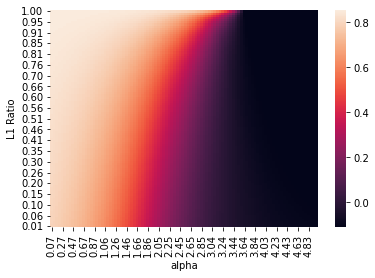

In [27]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))
    
plot_heatmap(np.fliplr(arr))

## Answer 1.5

The heat map is showing us the impact of varying the L1 Ratio and Alpha on the RSquared measurement. The map indicates that as the alpha term in minimized, the RSquared term increases, therby indicating a better model. The same logic applies for the L1 Ratio. However, perhaps a better measurement would have been Adjusted RSquared as that takes into account having multiple features.

# Question 2 (5 points)
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

By varying the ridge regression penalty you could infer whether your model is suffering from too much bias or variance. If the model was suffering from too much bais, increasing the penalty term should lower this bias as you are increasing the cost of having too many feautres present in the model (overfitting). If there was little improvement in the model by increasing the regression penalty, you could infer that your model was not suffering from too much bias.

## Answer 2

# Question 3 Bias-Variance (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [28]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load("q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a)

Mean Squared Error (Linear Regression):  4.739110717634691


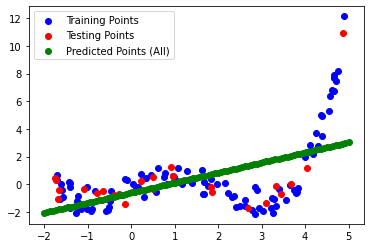

In [29]:
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(x_train, y_train)
pred_train_reg = reg.predict(x_all)
print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, reg.predict(x_test)))


fig, ax = plt.subplots()

ax.scatter(x_train, y_train, c='blue', label='Training Points')
ax.scatter(x_test, y_test, c='red', label='Testing Points')
ax.scatter(x_all, pred_train_reg, c='green', label='Predicted Points (All)')
ax.legend()

plt.show()

### (b)

Mean Squared Error (Linear Regression):  3.118688012803552
Mean Squared Error (Linear Regression):  1.6698703639509367
Mean Squared Error (Linear Regression):  0.2793974390234892
Mean Squared Error (Linear Regression):  0.40228761937651486


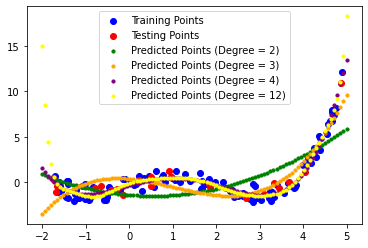

In [30]:
from sklearn.preprocessing import PolynomialFeatures 

# Degree == 2
poly2 = PolynomialFeatures(degree = 2) 
X_poly2 = poly2.fit_transform(x_train) 
poly2.fit(X_poly2, y_train)

lin2 = LinearRegression() 
lin2.fit(X_poly2, y_train)

print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin2.predict(poly2.fit_transform(x_test))))

# Degree == 3
poly3 = PolynomialFeatures(degree = 3) 
X_poly3 = poly3.fit_transform(x_train) 
poly3.fit(X_poly3, y_train)

lin3 = LinearRegression() 
lin3.fit(X_poly3, y_train)

print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin3.predict(poly3.fit_transform(x_test))))


# Degree == 4
poly4 = PolynomialFeatures(degree = 4) 
X_poly4 = poly4.fit_transform(x_train) 
poly4.fit(X_poly4, y_train)

lin4 = LinearRegression() 
lin4.fit(X_poly4, y_train)

print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin4.predict(poly4.fit_transform(x_test))))

# Degree == 12
poly12 = PolynomialFeatures(degree = 12) 
X_poly12 = poly12.fit_transform(x_train) 
poly12.fit(X_poly12, y_train)

lin12 = LinearRegression() 
lin12.fit(X_poly12, y_train)

print('Mean Squared Error (Linear Regression): ', mean_squared_error(y_test, lin12.predict(poly12.fit_transform(x_test))))


fig, ax = plt.subplots()

ax.scatter(x_train, y_train, c='blue', label='Training Points')
ax.scatter(x_test, y_test, c='red', label='Testing Points')
ax.scatter(x_all, lin2.predict(poly2.fit_transform(x_all)), c='green', label='Predicted Points (Degree = 2)', s=10)
ax.scatter(x_all, lin3.predict(poly3.fit_transform(x_all)), c='orange', label='Predicted Points (Degree = 3)', s=10)
ax.scatter(x_all, lin4.predict(poly4.fit_transform(x_all)), c='purple', label='Predicted Points (Degree = 4)', s=10)
ax.scatter(x_all, lin12.predict(poly12.fit_transform(x_all)), c='yellow', label='Predicted Points (Degree = 12)', s=10)
ax.legend()

plt.show()

### (c)

# Question 4 - Stochastic Gradient Descent (25 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [31]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch, initalCoefficentGuess):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
        # Initialize Coefficients
        self.coef = initalCoefficentGuess
        
    def sgd(self, gradient):
        self.coef = ([self.coef[0] - (gradient[0]*self.learning_rate),
                      self.coef[1] - (gradient[1]*self.learning_rate),
                      self.coef[2] - (gradient[2]*self.learning_rate),
                      self.coef[3] - (gradient[3]*self.learning_rate)]
                    )
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                error = (np.dot(np.transpose(self.coef), X[i]) - y[i])**2
                # Compute gradients
                #gradient = -2*np.dot(error,X[i].T)
                gradient = [
                    2 * error * 1,
                    2 * error * X[i][1] + 2 * self.regularization * self.coef[1],
                    2 * error * X[i][2] + 2 * self.regularization * self.coef[2],
                    2 * error * X[i][3] + 2 * self.regularization * self.coef[3]
                ]
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            
            fig, axs = plt.subplots(2, 1)
            fig.suptitle(str('Learning Rate: ' + str(self.learning_rate) + 
                             ', Regularization: ' + str(self.regularization) +
                             ', Lowest MSE: ' + str(self.lowest_mse)
                            ))
            axs[0].plot(range(self.n_epoch),mse)
            axs[0].set_xlabel('epoch')
            axs[0].set_ylabel('MSE')

            coefs = np.array(coefs)
            axs[1].plot(range(self.n_epoch),coefs[:,0],label='w0')
            axs[1].plot(range(self.n_epoch),coefs[:,1],label='w1')
            axs[1].plot(range(self.n_epoch),coefs[:,2],label='w2')
            axs[1].plot(range(self.n_epoch),coefs[:,3],label='w3')
            axs[1].legend()
            axs[1].set_xlabel('epoch')
            axs[1].set_ylabel('parameter value')
        if plot == False:
            return self.lowest_mse, self.learning_rate, self.regularization

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        #compute dot product of self.coef and X
        return np.dot(X,np.transpose(self.coef))
        
        
        

In [32]:
data = pd.read_csv('q4_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
#learning_rates = [0.00001, 0.00005, 0.0001, 0.1, 1, 10, 100]
regularization_rates = [0, 10, 100]

## Answer 

### 1.

Let $\hat{y}$:
$$\hat{y} = w_{0} + w_{1} * x_{1} + w_{2}*x_{1}*x_{2} + w_{3}*e^{-x_{1}}$$
and the cost function be defined as the SSE:
$$\left( \hat{y} - y \right)^{2} \Rightarrow \left( \left(w_{0} + w_{1} * x_{1} + w_{2}*x_{1}*x_{2} + w_{3}*e^{-x_{1}} \right) - y\right)^{2}$$

To find the coefficient updates for each weight, we need to perform the following calculations:
$$w_{0}^{\tau+1} = w_{0}^{\tau} - \gamma \frac{\partial L}{\partial w_{0}^{\tau}}$$
$$w_{1}^{\tau+1} = w_{1}^{\tau} - \gamma \frac{\partial L}{\partial w_{1}^{\tau}}$$
$$w_{2}^{\tau+1} = w_{2}^{\tau} - \gamma \frac{\partial L}{\partial w_{2}^{\tau}}$$
$$w_{3}^{\tau+1} = w_{3}^{\tau} - \gamma \frac{\partial L}{\partial w_{3}^{\tau}}$$

Therefore, the first step is to compute the partials for the cost functions with respect to every weight:

$$\frac{\partial L}{\partial w_{0}} = 2 * \left( \hat{y} - y \right)$$

$$\frac{\partial L}{\partial w_{1}} = 2 *  \left( \left(w_{0} + w_{1} * x_{1} + w_{2}*x_{1}*x_{2} + w_{3}*e^{-x_{1}} \right) - y\right) * x_{1} $$

$$\frac{\partial L}{\partial w_{1}} = 2 *  \left( \left(w_{0} + w_{1} * x_{1} + w_{2}*x_{1}*x_{2} + w_{3}*e^{-x_{1}} \right) - y\right) * x_{1} * x_{2}$$

$$\frac{\partial L}{\partial w_{1}} = 2 *  \left( \left(w_{0} + w_{1} * x_{1} + w_{2}*x_{1}*x_{2} + w_{3}*e^{-x_{1}} \right) - y\right) * e^{-x_{1}}$$

These equations simplify to:
$$\frac{\partial L}{\partial w_{0}} = 2 * \left( \hat{y} - y \right)$$

$$\frac{\partial L}{\partial w_{1}} = 2 *  \left( \hat{y} - y \right) * x_{1} $$

$$\frac{\partial L}{\partial w_{1}} = 2 * \left( \hat{y} - y \right) * x_{1} * x_{2}$$

$$\frac{\partial L}{\partial w_{1}} = 2 *  \left( \hat{y} - y \right) * e^{-x_{1}}$$

Therefore, since the learning rates are given, the coefficient updates for each weight are:
$$w_{0}^{\tau+1} = w_{0}^{\tau} - \gamma 2 * \left( \hat{y} - y \right)$$

$$w_{1}^{\tau+1} = w_{1}^{\tau} - \gamma 2 *  \left( \hat{y} - y \right) * x_{1}$$

$$w_{2}^{\tau+1} = w_{2}^{\tau} - \gamma 2 * \left( \hat{y} - y \right) * x_{1} * x_{2}$$

$$w_{3}^{\tau+1} = w_{3}^{\tau} - \gamma 2 *  \left( \hat{y} - y \right) * e^{-x_{1}}$$

{'Lowest MSE': [0.09457272856329434, 0.10180808764267156], 'Learning Rate': [0.0001, 0.0001], 'Regulatization Rate': [0, 10]}


'\ntest = Regression(learning_rates[2], regularization_rates[0], n_epochs, initalCoefficentGuess)\ntest.fit(X, y, plot=True)\n\ntest = Regression(learning_rates[2], regularization_rates[0], n_epochs, initalCoefficentGuess)\ntest.fit(X, y, plot=True)\n\ntest = Regression(learning_rates[2], regularization_rates[0], n_epochs, initalCoefficentGuess)\ntest.fit(X, y, plot=True)\n'

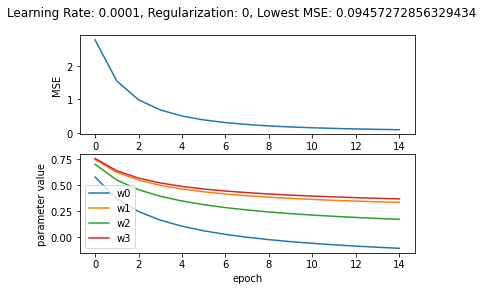

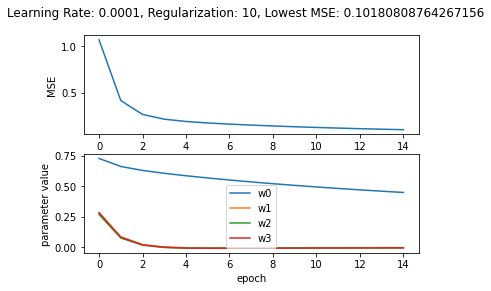

In [33]:
import math

initalCoefficentGuess = np.array([1, 1, 1, 1])

best_model_parameters = {'Lowest MSE': [float('inf'), float('inf')],
                        'Learning Rate': [0, 0],
                        'Regulatization Rate': [0, 0]
                        }
def checkForLess(list1, number):
    for index, value in enumerate(list1):  
        if number < value:  
            return True, index
            break
    return False, 0
for learning_rate in learning_rates:
    for regularization_rate in regularization_rates:
        test = Regression(learning_rate, regularization_rate, n_epochs, initalCoefficentGuess)
        results = test.fit(X, y, plot=False)
        
        if not math.isnan(results[0]):
            better_model, index = checkForLess(best_model_parameters['Lowest MSE'],results[0])
            if better_model:
                best_model_parameters['Lowest MSE'][index] = results[0]
                best_model_parameters['Learning Rate'][index] = results[1]
                best_model_parameters['Regulatization Rate'][index] = results[2]

print(best_model_parameters)

for i in range(2):
    test = Regression(best_model_parameters['Learning Rate'][i], 
                      best_model_parameters['Regulatization Rate'][i], 
                      n_epochs, 
                      initalCoefficentGuess
                     )
    results = test.fit(X, y, plot=True)
'''
test = Regression(learning_rates[2], regularization_rates[0], n_epochs, initalCoefficentGuess)
test.fit(X, y, plot=True)

test = Regression(learning_rates[2], regularization_rates[0], n_epochs, initalCoefficentGuess)
test.fit(X, y, plot=True)

test = Regression(learning_rates[2], regularization_rates[0], n_epochs, initalCoefficentGuess)
test.fit(X, y, plot=True)
'''
    
    